In [8]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [5]:
#Loading the dataset
data = pd.read_csv("D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Coding\\student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
data.shape

(25, 2)

In [11]:
#Exploring the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot: title={'center': 'Scatterplot of hours and scores percentage'}, xlabel='Hours', ylabel='Scores'>

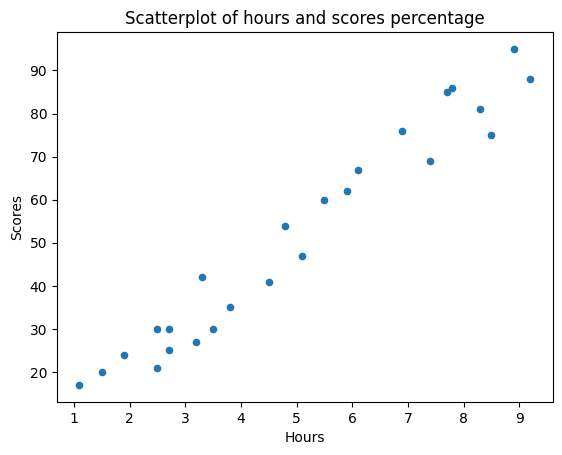

In [9]:
#Scatter plot
data.plot.scatter(x='Hours',y='Scores',title='Scatterplot of hours and scores percentage')

In [10]:
#Calculating the correlation between the 2 variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


* As shown in the above results there is a strong positive linear relationship between the 'hours' and the 'scores' variables.

In [32]:
#Data Preprocessing
x = data['Hours'].values.reshape(-1,1)
y = data['Scores'].values.reshape(-1,1)

In [33]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [34]:
data['Scores'].shape

(25,)

In [35]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [36]:
y.shape

(25, 1)

In [37]:
SEED = 42
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=SEED)

In [38]:
x_train

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [39]:
y_train

array([[25],
       [42],
       [47],
       [35],
       [20],
       [27],
       [41],
       [95],
       [75],
       [30],
       [30],
       [24],
       [54],
       [67],
       [86],
       [60],
       [85],
       [17],
       [69],
       [88]], dtype=int64)

In [40]:
#Building the model
regressor = LinearRegression()

In [41]:
#training the model
regressor.fit(x_train,y_train)

LinearRegression()

In [42]:
regressor.intercept_

array([2.82689235])

In [43]:
regressor.coef_

array([[9.68207815]])

* The formula is **score = 2.82689235 + 9.68207815** * **hours** 

In [49]:
#Making predictions
def calc(slope,intercept,hours):
    return intercept + slope * hours

In [50]:
score = calc(regressor.coef_,regressor.intercept_,9.5)
print(score)

[[94.80663482]]


In [53]:
#Should pass the value as a 2D array
score = regressor.predict([[9.5]])
score

array([[94.80663482]])

In [54]:
y_pred = regressor.predict(x_test)
y_pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

* **squeeze() function is used when we want to remove single-dimensional entries from the shape of the array.**

In [55]:
data_predictions = pd.DataFrame({'Actual':y_test.squeeze(),'Predicted':y_pred.squeeze()})
data_predictions

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


* To check the model accuracy of a regression model we can use:
1. Mean Absolute Error(MAE) - When we subtract the predicted values from the actual values, obtaining the errors, sum the absolute values of those errors and get their mean. This metric gives a notion(conception or impression of something known, experienced, or imagined) of the overall error for each prediction of the model, the smaller(closer to 0) the better.
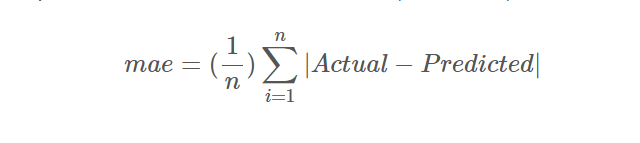

2. Mean Squared Error(MSE) -  It is similar to the MAE metric, but it squares the absolute values of the errors. Also, as with MAE, the smaller, or closer to 0, the better. The MSE value is squared so as to make large errors even larger. One thing to pay close attention to, it that it is usually a hard metric to interpret due to the size of its values and of the fact that they aren't in the same scale of the data.
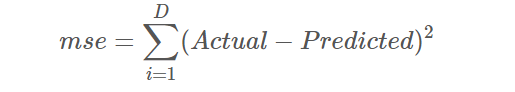

3. Root Mean Squared Error(RMSE) - Tries to solve the interpretation problem raised with the MSE by getting the square root of its final value, so as to scale it back to the same units of the data. It is easier to interpret and good when we need to display or show the actual value of the data with the error. It shows how much the data may vary, so, if we have an RMSE of 4.35, our model can make an error either because it added 4.35 to the actual value, or needed 4.35 to get to the actual value. The closer to 0, the better as well.
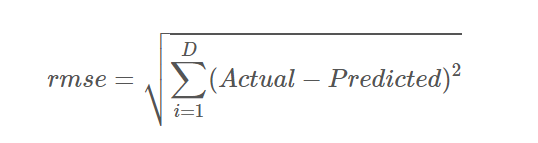

In [56]:
#Checking the model accuracy
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)

In [58]:
print(f'Mean absolute error:{mae:.5f}')
print(f'Mean squared error:{mse:.5f}')
print(f'Root mean squared error:{rmse:.5f}')

Mean absolute error:3.92075
Mean squared error:18.94321
Root mean squared error:4.35238
